# HW 2 - Light Option 

Note: I collaborated with V Hurtado and Megan Gialluca on this homework. I also consulted with other grads who had taken the class before

## Problem 1 (L) ✅

Really just getting used to your stats package, we will do a few simple calculations using 
Gaussian distribution.  
- a) Create 1e6 random throws from a standard normal distribution (zero mean, variance 1 Gaussian). Generate semilogy histogram. 
- b) Calculate the fraction of the pdf in the upper tail above integer sigma values 1 through 5. (This should not be the number of events thrown in part a, but the actual numerical integral. Don’t actually do the integrals, use your library. There are multiple ways of doing this, think about what is most accurate. In particular subtracting two large numbers to get a small number can lead to numerical error. ) 
- c) Compare the fraction of events from your random sample to what you expected from part b) 
- d) Reverse the problem. Choose a small probability (something less than 1e-6) and calculate the associated ‘sigma’ for that probability. 

In [30]:
import numpy as np 
import astropy.units as u
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import expon, norm, erlang 
import scipy
import matplotlib.pyplot as plt 
from scipy.stats import poisson

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 25

# update various fontsizes to match
params = {'figure.figsize': (11, 11),
          'legend.fontsize': 13,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

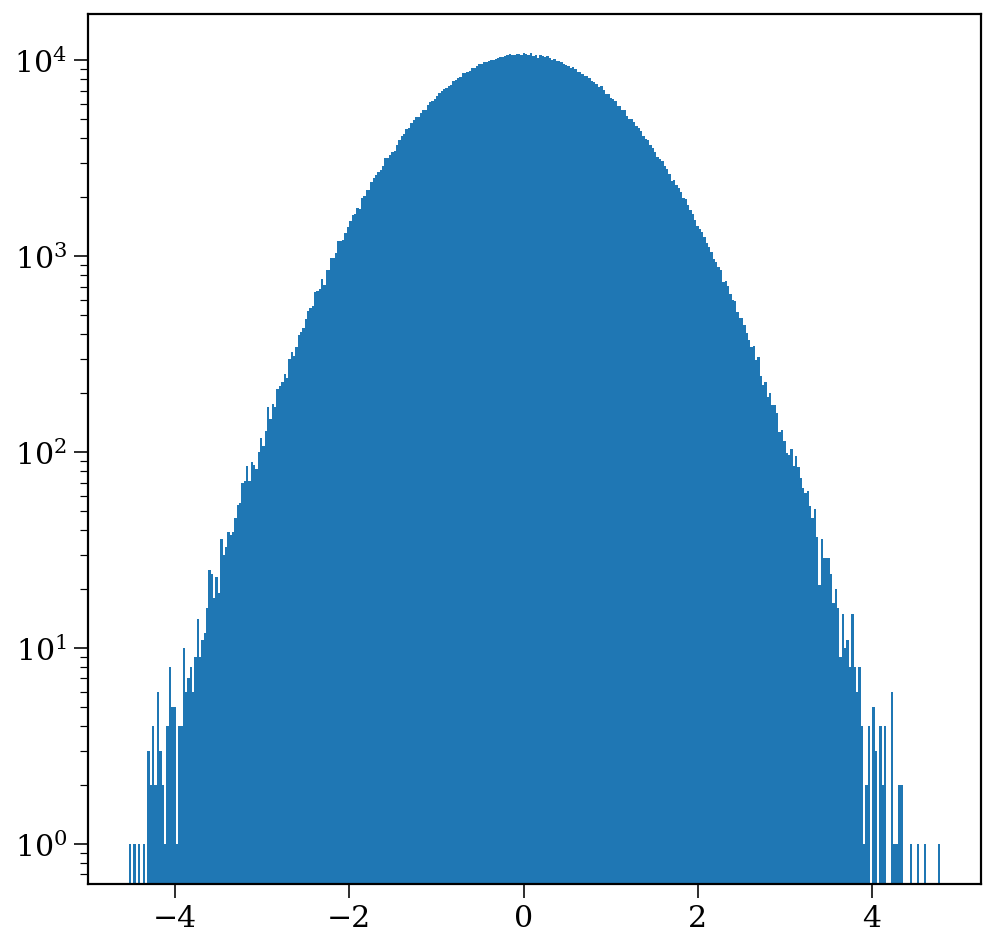

In [2]:
# Part a 

N = 10**6 #1e6
mu = 0
sigma = 1

snd = np.random.normal(mu, sigma, N)

#want to plot a histogram 
plt.hist(snd, bins='fd')
plt.semilogy()
plt.show()

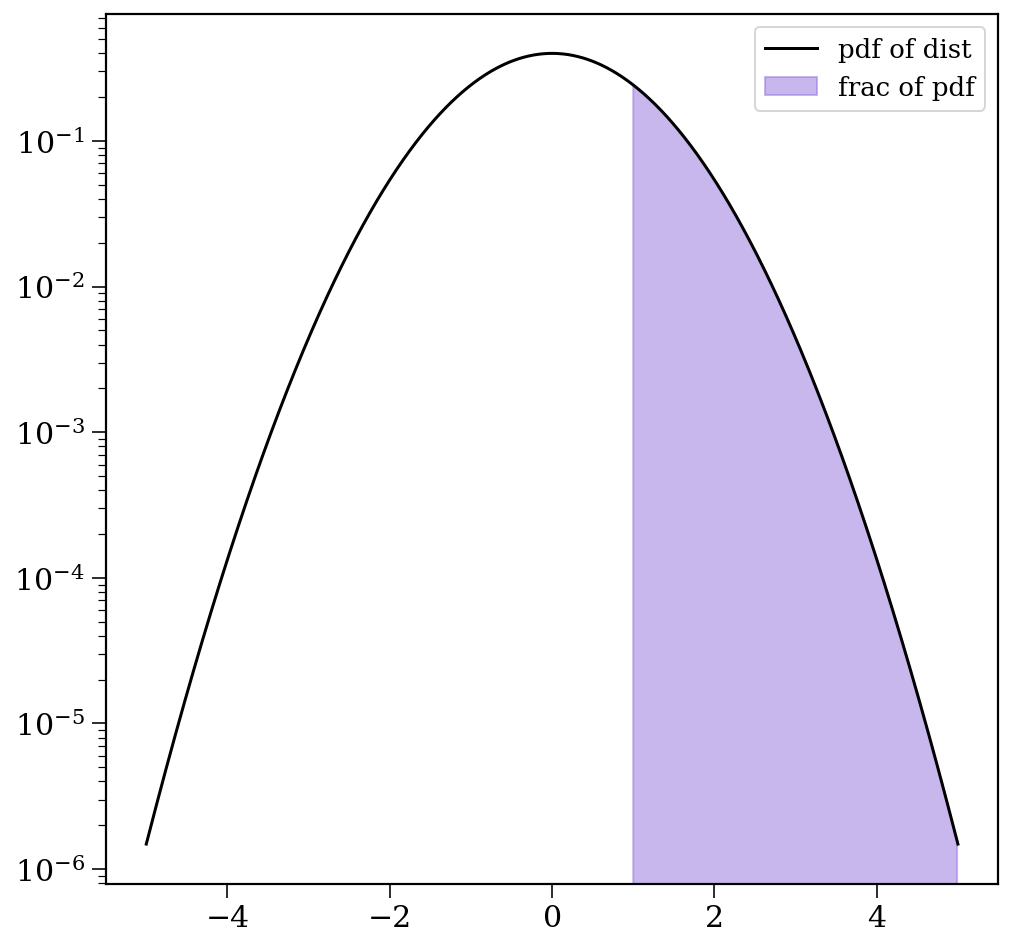

cdf: 0.15865496727988515


In [3]:
#part b 

#want a range of the numbers that we want (grid)
grid_x = np.linspace(-5,5,1000)
#grid = np.linspace(-5,5, 1000)

#Get the distribution of that 
dist = norm(mu,sigma)

#Take the pdf of that 
dist_pdf = dist.pdf(grid_x)

#and then calculate the cdf from that (5-1) 
dist_cdf = norm(mu,sigma).cdf(5) - norm(mu,sigma).cdf(1)

x= np.arange(1,5,0.01)

plt.plot(grid_x, dist_pdf, 'k-', label = 'pdf of dist')
plt.fill_between(x, norm.pdf(x,loc=mu,scale=sigma), alpha=0.5, color='mediumpurple', label = 'frac of pdf')
plt.legend()
plt.semilogy()
plt.show()
print('cdf:', dist_cdf)

In [4]:
#part c (Want to compare the fraction of events) 

Nsamples = 0 

for i in snd: 
    if i>1 and i<5: 
        Nsamples = Nsamples +1 
        
fraction = Nsamples/len(snd)

print("The fraction of events that were randomly sampled btw 1 and 5 simga are:", fraction)

The fraction of events that were randomly sampled btw 1 and 5 simga are: 0.158629


As noted above in part a the probability (cdf) was 0.158 and the fraction is 0.159 so they are EXTREMELY comparable (or roughly the same). So both methods are valid 

In [5]:
#part d

tiny_prob = 1e-6

#calculate the prob using the ppf using the dist from b 
tiny_ppf = dist.ppf(1-tiny_prob)
print("sigma:", tiny_ppf)

sigma: 4.753424308817087


In [6]:
from scipy.stats import expon #this is the non gaussian distribution that I chose (EXPONENTIAL)

#Display the probability density function (pdf):
x = np.linspace(0, 18, 1000)

#generate random numbers (simulate background events)
r = expon.rvs(size=10**6)

## Problem 2 (L) ✅

### Choose a non-Gaussian distribution of your choosing, and simulate a set of background events drawn from that distribution (~10^6 is a good number of events). Then choose a candidate event you wish to determine the significance of (null hypothesis). 
- a) Plot a histogram of the background events and the overlaid analytic distribution on semilogy axes.  
- b) Clearly describe what ‘more signal like’ means for your case (probably involves creating a little story about what the measurement is). Convert your story into an integral. 
- c) Determine the probability of the background producing an event as signal-like or more than your candidate. 
- d) Determine the ‘sigma’ of your candidate, and discuss whether this was significant detection or not. (This may involve community standards for your field of study.) 

In [7]:
#part a 
from scipy.stats import expon #this is the non gaussian distribution that I chose (EXPONENTIAL)

r = expon.rvs(size=10**6)
x = np.linspace(0, max(r), 1000)

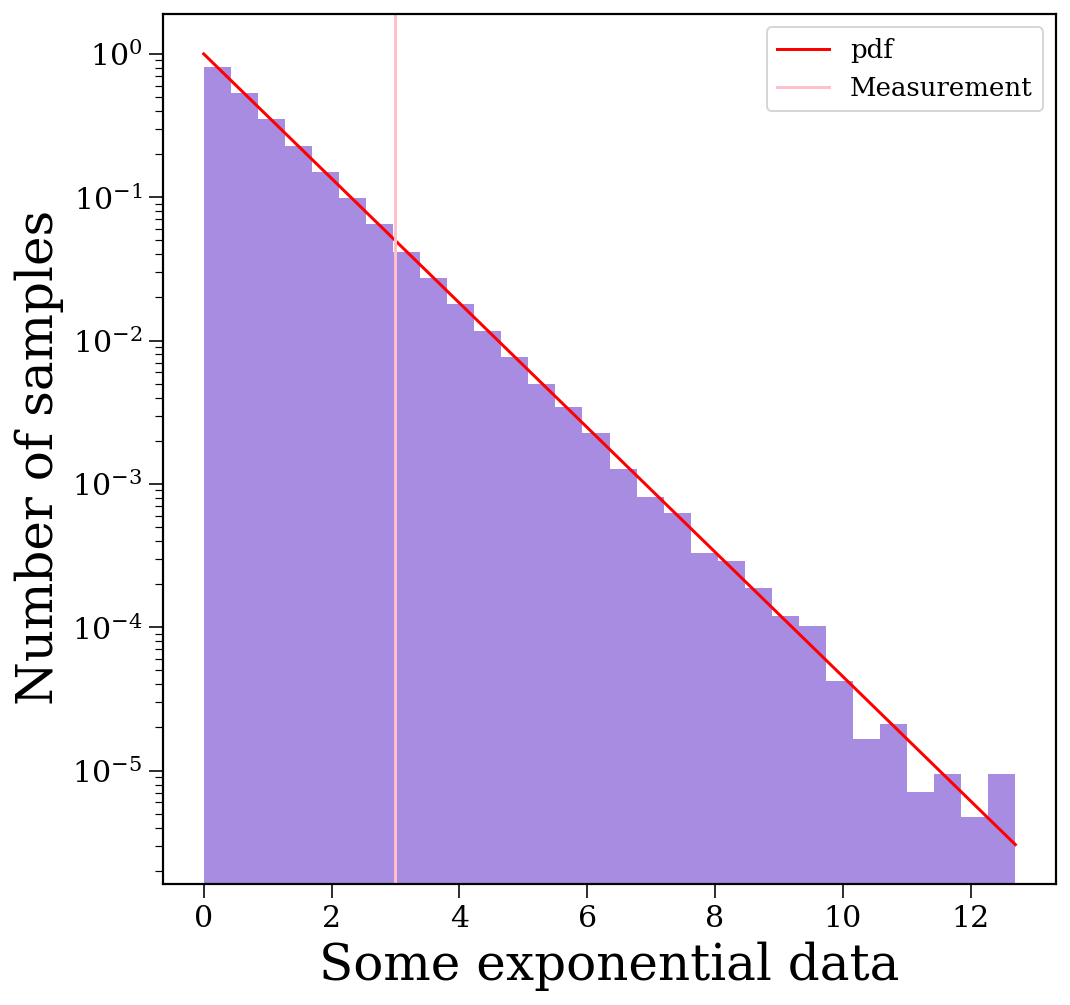

In [8]:
plt.hist(r, bins=30, density=True, color = 'mediumpurple', alpha=0.8)
plt.plot(x, expon.pdf(x), 'r-', label='pdf')
plt.axvline(3, color='pink', label='Measurement')
plt.yscale('log')
plt.xlabel('Some exponential data')
plt.ylabel('Number of samples ')
plt.legend()
plt.show()

In [9]:
#part b 
#We are trying to find the probability of seeing a signal in this highly probable area which is anything after 6 is the question we are trying to answer
# by calculating the area under the "curve" of the exponental distribution 

Meas = 3

exp_cdf = expon(x).cdf(max(x)) - expon(x).cdf(Meas)

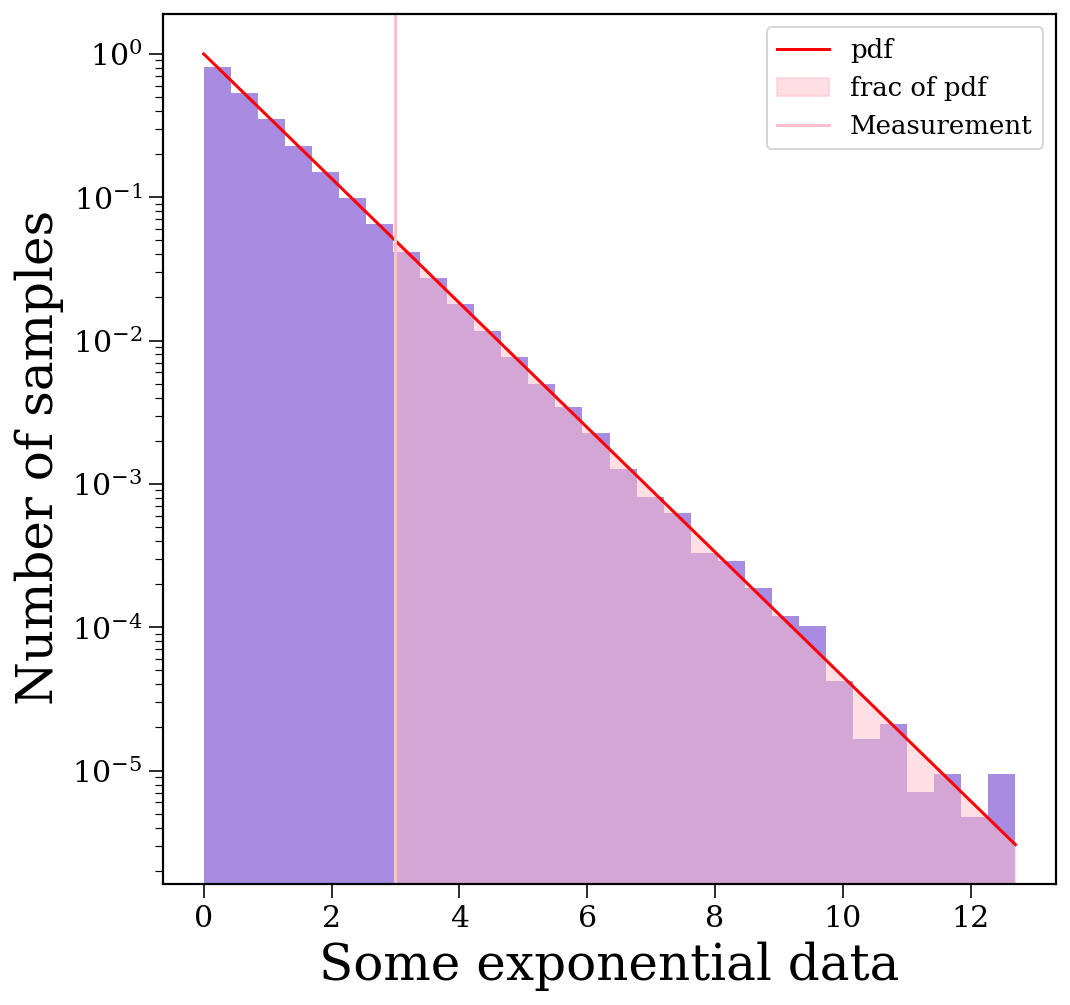

In [10]:
#So that we can fill between and see the things 
new_x = np.arange(Meas,max(x),0.01)

plt.hist(r, bins=30, density=True, color = 'mediumpurple', alpha=0.8)
plt.plot(x, expon.pdf(x), 'r-', label='pdf')
plt.fill_between(new_x, expon.pdf(new_x), alpha=0.5, color='pink', label = 'frac of pdf')
plt.axvline(Meas, color='pink', label='Measurement')
plt.yscale('log')
plt.legend()
plt.xlabel('Some exponential data')
plt.ylabel('Number of samples ')
plt.show()

In [11]:
#part c 

import scipy.integrate as integrate
import scipy.special as special

prob, uncert = integrate.quad(expon.pdf, Meas, np.inf)
print('prob:',prob)
print('prob percentage:',prob*100)

prob: 0.04978706836783998
prob percentage: 4.9787068367839975


In [12]:
#part d

#calculate the prob using the ppf using the dist from b 
exp_ppf = norm.ppf(1-prob)
print("sigma:", exp_ppf)

sigma: 1.646921720527948


## Problem 4) (L) ✅

### Assume you are able to average multiple observations from Problem 2 together (the signal is of constant strength over multiple identical observing runs).  
- a) Calculate the pdf of the average of N observations (pick N; makes sure distribution is getting narrower). 
- b) Explore how the significance of your candidate changes as you average more observations together (increase N). 
- c) How many observations must you average together before you can use Gaussian statistics? Discuss some of the subtleties and approximations needed to answer this question. 

In [13]:
#averaging the observations for plotting
n = 10 

r_multi_samp = [expon.rvs(1, size=int(1e6))for i in range(n)]

avg_multi_samp = sum(r_multi_samp)/n
avg_multi_samp

array([2.55151776, 2.0657299 , 2.41747721, ..., 2.21187923, 1.52483268,
       2.0549647 ])

Separate Idea starts here

In [14]:
#averaging so that we can get pdf
n_samples = 10**6
samples = []
for i in range(n):
    samples.append(expon.rvs(1, size=int(1e6)))
    
avg = sum(samples)/n

print(avg)

[2.31959755 1.66942524 2.6958015  ... 1.90122017 2.35870428 2.4525984 ]


In [15]:
#for the pdf (needed arrays so we could get number)
r_avg = sum(avg >= 3)/n_samples
r_avg

0.004994

In [16]:
#Calculating the pdf 
pdf_check = norm.ppf(1-r_avg)
print('pdf of the avg of N=10 observations:', pdf_check)

pdf of the avg of N=10 observations: 2.5762444706048706


Separate idea ends here 

In [17]:
#That idea was a good start but then I remembered the part in the lecture where we needed to use the slides and since we used an exponential we need 
# to use an erlang function (slide 22 from class 3) 

sh, loc, scale = erlang.fit(avg_multi_samp)

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.5.
  RuntimeWarning)
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.333333333333332.
  RuntimeWarning)
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.722222222222221.
  RuntimeWarning)
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.037037037037035.
  RuntimeWarning)
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuo

In [18]:
loc

0.9974299689560174

In [19]:
scale

0.09965471996563999

In [20]:
sh

10.063131523834418

In [21]:
10**(-4)

0.0001

In [ ]:
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = erlang.pdf(bin_centers, int(sh), loc=loc, scale=scale) 

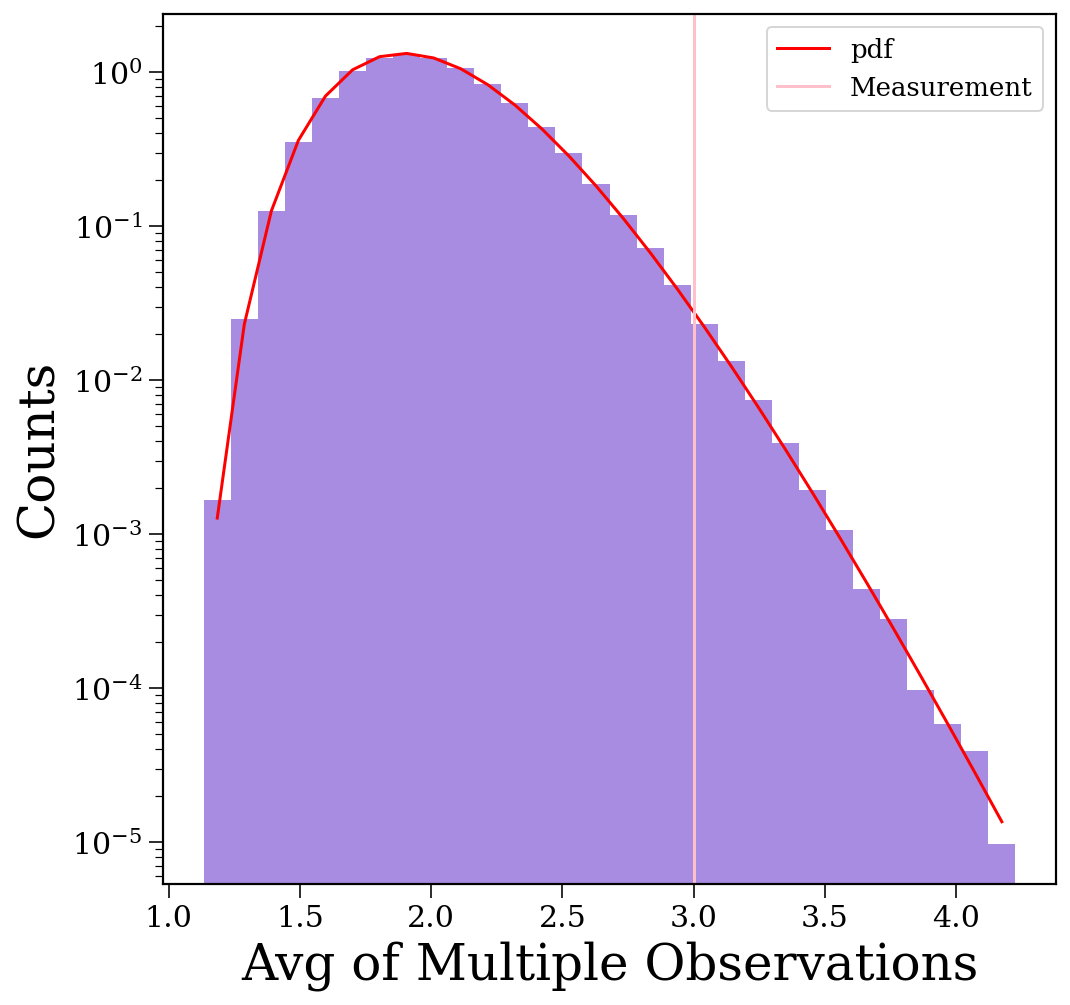

In [26]:
(vals, bins, i)  = plt.hist(avg_multi_samp, bins=30, color='mediumpurple', density=True, alpha=0.8)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = erlang.pdf(bin_centers, int(sh), loc=loc, scale=scale) 
plt.plot(bin_centers, pdf, color='red', label = 'pdf')
plt.axvline(Meas, color='pink', label='Measurement')
plt.ylabel('Counts')
plt.xlabel('Avg of Multiple Observations')
plt.legend()
plt.semilogy()
plt.show()

In [38]:
#it is starting to look more Gaussian so let me up the anty 

#averaging the observations for plotting
n = 100 #tried 1000 but I got an inf for my sigma so need to try something smaller 

r_multi_samp = [expon.rvs(1, size=int(1e6))for i in range(n)]

avg_multi_samp = sum(r_multi_samp)/n
print(avg_multi_samp)

sh, loc, scale = erlang.fit(avg_multi_samp)

[1.98346325 2.06292745 2.078601   ... 2.11252854 1.84803363 2.08351049]


/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 106.05000000000001.
  RuntimeWarning)
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 104.36666666666667.
  RuntimeWarning)
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 98.19444444444443.
  RuntimeWarning)
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 101.37407407407409.
  RuntimeWarning)
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/scipy/s

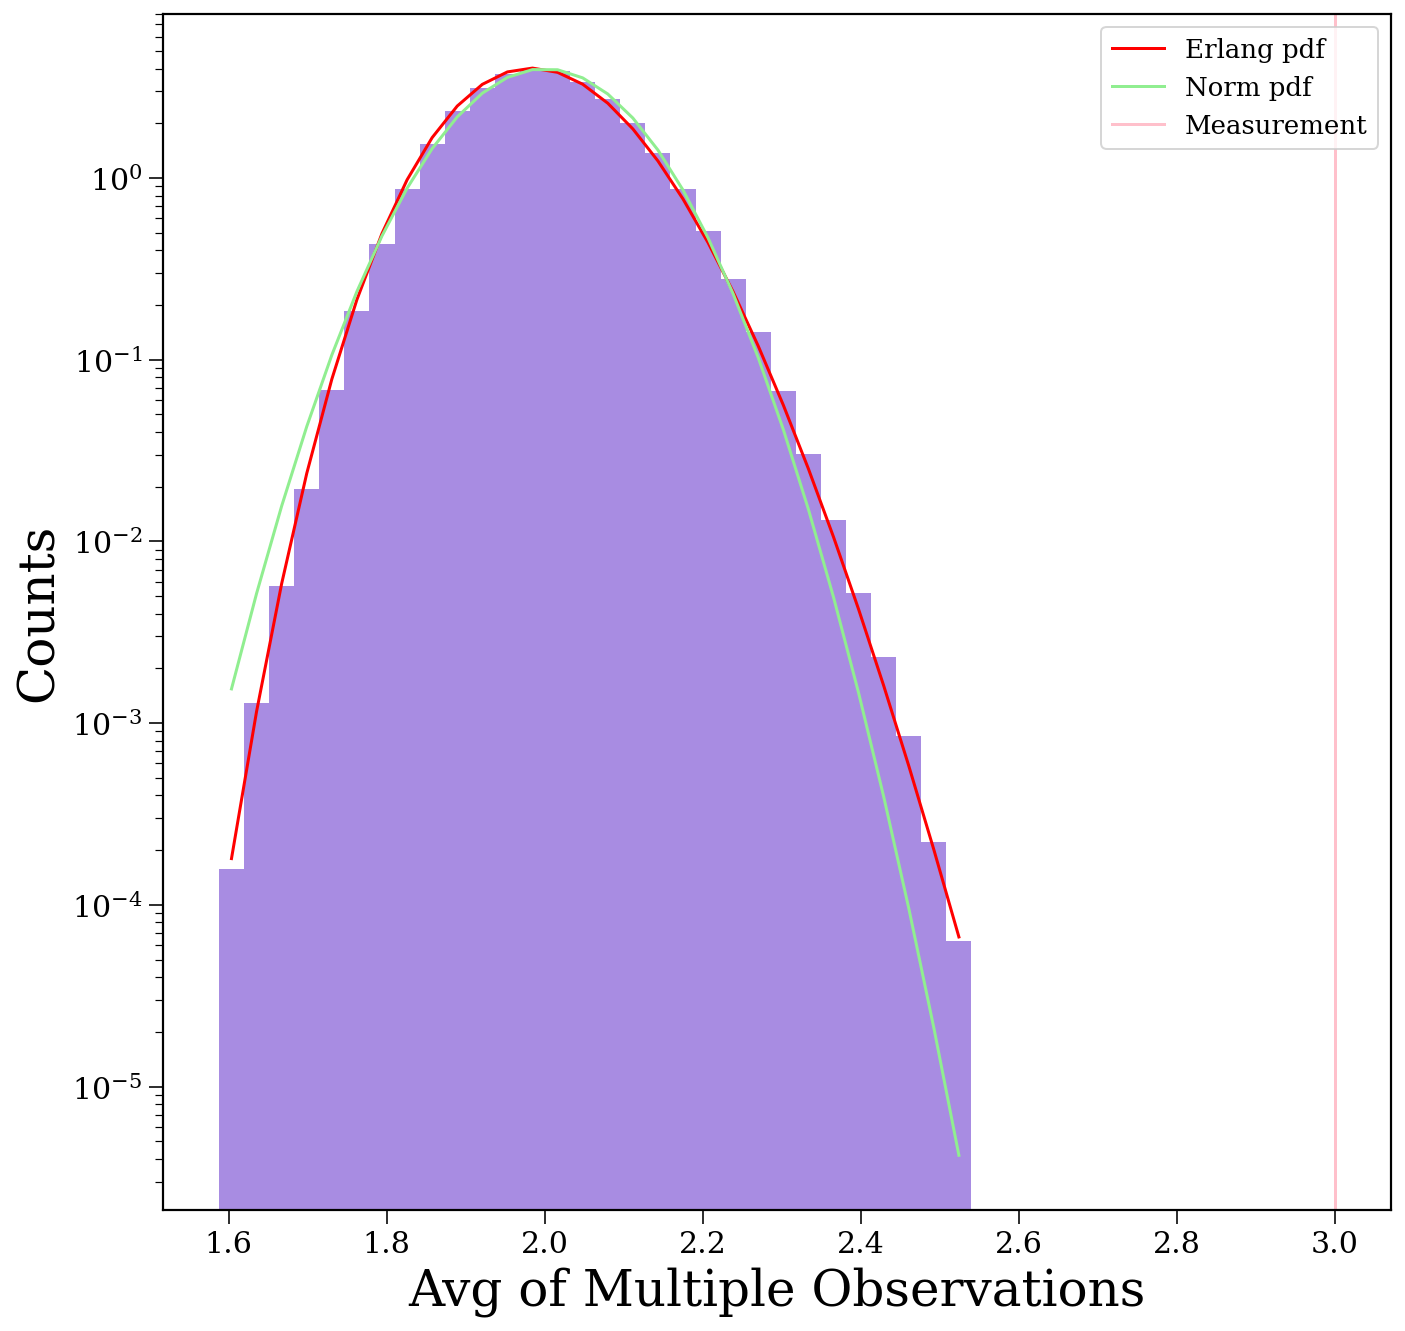

In [39]:
(vals, bins, i)  = plt.hist(avg_multi_samp, bins=30, color='mediumpurple', density=True, alpha=0.8)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = erlang.pdf(bin_centers, int(sh), loc=loc, scale=scale) 
plt.plot(bin_centers, pdf, color='red', label = 'Erlang pdf')
pdf_norm = norm.pdf(bin_centers, loc=np.mean(avg_multi_samp), scale=np.std(avg_multi_samp))
plt.plot(bin_centers, pdf_norm, color = 'lightgreen', label='Norm pdf')
plt.axvline(Meas, color='pink', label='Measurement')
plt.ylabel('Counts')
plt.xlabel('Avg of Multiple Observations')
plt.legend()
plt.semilogy()
plt.show()

In [40]:
#I want to see the difference between the cdf of what I have plotted vs the measurement 

smol = erlang.cdf(np.inf, int(sh), loc=loc, scale=scale) - erlang.cdf(Meas, int(sh), loc=loc, scale=scale) #similar to tiny in previous problem 

sig = norm.ppf(1-smol)

print('Sigma det for 100 observations is:', sig) #got infinity for 1000 and 500 so cut it down to 100 and was able to get an answer 

Sigma det for 1000 observations is: 7.928367942870712


### part c

Well I tried to see some higher numbers to start (1000 and 500) and then was able to get a sigma for 100. I think that we are already at almost a good approximation. Essentially the more observations you have the better change you have of being able to use Gaussian statistics. There are always going to be subtleties but that will depend on the type of data that you are handling 